In [8]:
%load_ext autoreload
%autoreload 2


from util import *
from myalgorithm import algorithm



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [9]:
!pip install matplotlib


In [10]:
import sys
!{sys.executable} -m pip install numpy


In [11]:

problem_file = 'STAGE1_1.json'
timelimit = 300

# np.random.seed(1)

with open(problem_file, 'r') as f:
    prob = json.load(f)

K = prob['K']

ALL_ORDERS = [Order(order_info) for order_info in prob['ORDERS']]
ALL_RIDERS = [Rider(rider_info) for rider_info in prob['RIDERS']]

DIST = np.array(prob['DIST'])
for r in ALL_RIDERS:
    r.T = np.round(DIST/r.speed + r.service_time)

alg_start_time = time.time()

exception = None

solution = None
try:
    # Run algorithm!
    solution = algorithm(K, ALL_ORDERS, ALL_RIDERS, DIST, timelimit)
except Exception as e:
    exception = f'{e}'


alg_end_time = time.time()

with open(problem_file, 'r') as f:
    prob = json.load(f)

K = prob['K']

ALL_ORDERS = [Order(order_info) for order_info in prob['ORDERS']]
ALL_RIDERS = [Rider(rider_info) for rider_info in prob['RIDERS']]

DIST = np.array(prob['DIST'])
for r in ALL_RIDERS:
    r.T = np.round(DIST/r.speed + r.service_time)

checked_solution = solution_check(K, ALL_ORDERS, ALL_RIDERS, DIST, solution)

checked_solution['time'] = alg_end_time - alg_start_time
checked_solution['timelimit_exception'] = (alg_end_time - alg_start_time) > timelimit + 1 # allowing additional 1 second!
checked_solution['exception'] = exception

checked_solution['prob_name'] = prob['name']
checked_solution['prob_file'] = problem_file

checked_solution

FileNotFoundError: [Errno 2] No such file or directory: 'STAGE1_1.json'

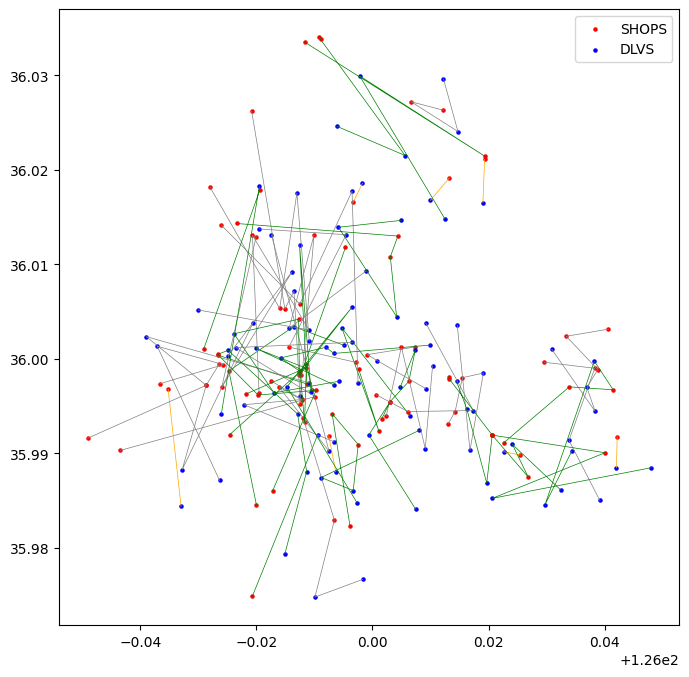

In [15]:
draw_route_solution(ALL_ORDERS, checked_solution)

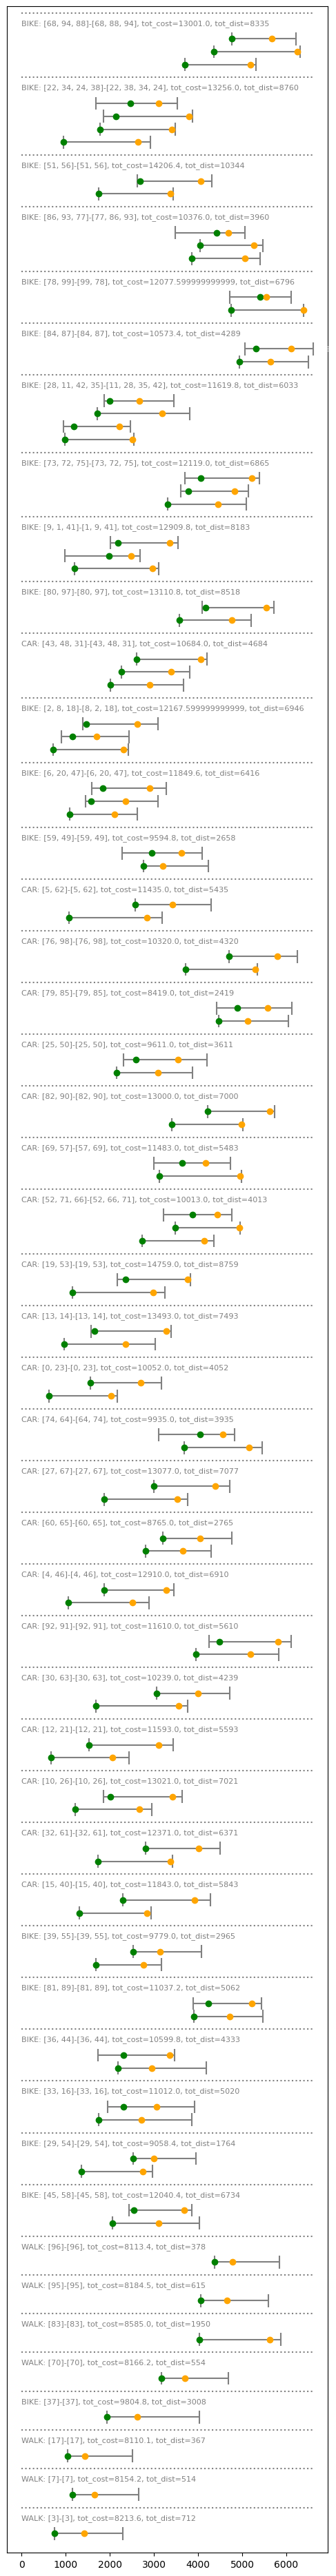

In [16]:
draw_bundle_solution(ALL_ORDERS, ALL_RIDERS, DIST, checked_solution)